In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tables
import h5py
from scipy.spatial.distance import pdist, squareform
import os

[0.90073993 1.05086325 0.85069883 ... 0.9808057  1.01083037 0.95078104] 2.2504220709151923e-12


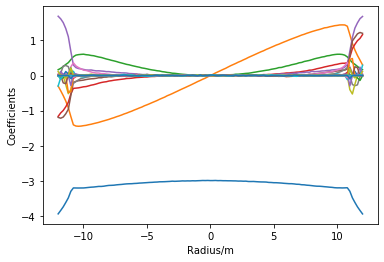

In [67]:
# view fit pe goodness
def findfile(radius):
    filename = '../coeff_pe_5kt_sparse_21/5kt_' + radius + '.h5'
    #print(filename)
    h = tables.open_file(filename,'r')
    coeff = np.array(h.root.coeff)[:]
    expect = np.array(h.root.mean)[:]
    predict = np.array(h.root.predict)[:]
    h.close()
    return coeff, expect, predict

coeff = [];
expect = [];
predict = [];

a1,a2,a3 = findfile('+0.00')
mean = np.exp(np.sum(np.log(np.array(a2)))/8607)
x = np.array(a2)/mean
print(x,np.sum(np.log(x)))

for i in np.arange(12.0001,-12,-0.2):
    file_str = '%+.2f' % i
    a1,a2,a3 = findfile(file_str)
    coeff.append(a1)
    expect.append(a2)
    predict.append(a3)

time_coeff = np.array(coeff)
radius = np.arange(12.01,-12,-0.2)
plt.plot(radius, time_coeff)
plt.xlabel('Radius/m')
plt.ylabel('Coefficients')
plt.show()
def ReadPMT(geo):
    f = open(r'../PMT_' + geo + '.txt')
    line = f.readline()
    data_list = []
    while line:
        num = list(map(float,line.split()))
        data_list.append(num)
        line = f.readline()
    f.close()
    PMT_pos = np.array(data_list)
    PMT_pos = PMT_pos[:,1:4]
    return PMT_pos

PMT_pos = ReadPMT('5kt')
z_uni = np.unique(PMT_pos[:,2])
vertex = np.array([0,2,10])
cos_theta = np.sum(vertex*PMT_pos,axis=1)\
    /np.sqrt(np.sum(vertex**2)*np.sum(PMT_pos**2,axis=1))
predict = np.array(predict)

predict1 = np.zeros((np.size(radius), np.size(z_uni)))
for j,r in enumerate(radius):
    for i in np.arange(np.size(z_uni)):
        predict1[j,i] = np.mean(np.array(expect)[j,PMT_pos[:,2] == z_uni[i]])

In [68]:
predict1.shape

(121, 81)

In [24]:
expect

[array([2.6495, 2.607 , 2.679 , ..., 0.0165, 0.013 , 0.0125]),
 array([2.307 , 2.2715, 2.4235, ..., 0.016 , 0.0175, 0.0155]),
 array([1.9145, 1.9245, 2.041 , ..., 0.029 , 0.0265, 0.0245]),
 array([1.692 , 1.697 , 1.7545, ..., 0.0315, 0.0235, 0.025 ]),
 array([1.53  , 1.472 , 1.5775, ..., 0.022 , 0.0175, 0.019 ]),
 array([1.346 , 1.2915, 1.374 , ..., 0.0145, 0.0175, 0.0165]),
 array([1.198 , 1.141 , 1.178 , ..., 0.0185, 0.014 , 0.015 ]),
 array([1.0725, 1.027 , 1.0895, ..., 0.01  , 0.02  , 0.0145]),
 array([0.9525, 0.927 , 1.0235, ..., 0.0155, 0.018 , 0.017 ]),
 array([0.8705, 0.84  , 0.89  , ..., 0.015 , 0.0155, 0.0125]),
 array([0.7625, 0.728 , 0.775 , ..., 0.016 , 0.0175, 0.0155]),
 array([0.723 , 0.6835, 0.7255, ..., 0.0155, 0.0135, 0.0155]),
 array([0.6335, 0.617 , 0.674 , ..., 0.017 , 0.0175, 0.011 ]),
 array([0.595 , 0.5915, 0.597 , ..., 0.016 , 0.021 , 0.0165]),
 array([0.559 , 0.5555, 0.563 , ..., 0.0205, 0.017 , 0.0195]),
 array([0.539 , 0.4505, 0.492 , ..., 0.0225, 0.022 , 0.

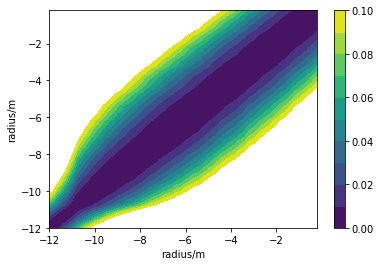

<Figure size 432x288 with 0 Axes>

In [80]:
dis = np.log(np.log(squareform(pdist(np.array(predict1),'cosine'))+1)+1)
radius = np.arange(-12,0,0.2)
plt.contourf(radius,radius, dis[0:60,0:60],np.arange(0,0.11,0.01))
plt.xlabel('radius/m')
plt.ylabel('radius/m')
plt.colorbar()
plt.show()
plt.savefig('dist.png')

In [29]:
np.array(expect).shape

(121, 8607)

In [30]:
12/0.2*2

120.0